<a href="https://colab.research.google.com/github/omah03/MedicalCostPredictor/blob/main/Medical_Cost_Predictoripynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing required libraries

In [137]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Preprocessing  the dataset

In [138]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a coloumn transformer
ct = make_column_transformer(
    (StandardScaler(),["age","bmi","children"]),#Turn the values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
    )
#Create X and Y
X = insurance.drop("charges",axis =1)
y = insurance["charges"]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Fit column transformer to out training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScalar)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal

array([[ 0.47222651, -1.75652513,  0.73433626, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.54331294, -1.03308239, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8987451 , -0.94368672, -0.91119211, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [-0.16755139,  2.82086429,  0.73433626, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.1120044 , -0.10932713, -0.91119211, ...,  0.        ,
         0.        ,  1.        ]])

###Building a feedforward neural network

In [141]:
#EarlyStoppingCallback
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)
tf.random.set_seed(42)
#1. Creating the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                          metrics =["mae"])
history = insurance_model_3.fit(X_train_normal,y_train,epochs=2000,callbacks=[callback],verbose=1)

Epoch 1/2000
34/34 [==============================] - 2s 4ms/step - loss: 13344.0732 - mae: 13344.0732
Epoch 2/2000
34/34 [==============================] - 0s 4ms/step - loss: 13336.6064 - mae: 13336.6064
Epoch 3/2000
34/34 [==============================] - 0s 4ms/step - loss: 13318.8828 - mae: 13318.8828
Epoch 4/2000
34/34 [==============================] - 0s 5ms/step - loss: 13283.0508 - mae: 13283.0508
Epoch 5/2000
34/34 [==============================] - 0s 4ms/step - loss: 13220.2363 - mae: 13220.2363
Epoch 6/2000
34/34 [==============================] - 0s 4ms/step - loss: 13121.4541 - mae: 13121.4541
Epoch 7/2000
34/34 [==============================] - 0s 4ms/step - loss: 12978.0605 - mae: 12978.0605
Epoch 8/2000
34/34 [==============================] - 0s 4ms/step - loss: 12782.0527 - mae: 12782.0527
Epoch 9/2000
34/34 [==============================] - 0s 4ms/step - loss: 12525.3271 - mae: 12525.3271
Epoch 10/2000
34/34 [==============================] - 0s 4ms/step - loss

In [142]:
#Evaluate model 3
insurance_model_3.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3160.5974 - mae: 3160.5974


[3160.597412109375, 3160.597412109375]

Text(0.5, 0, 'epochs')

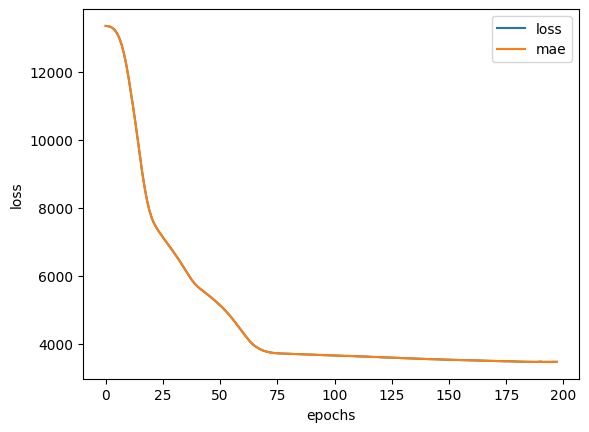

In [143]:
#Plot history (loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

9/9 [==============================] - 0s 5ms/step


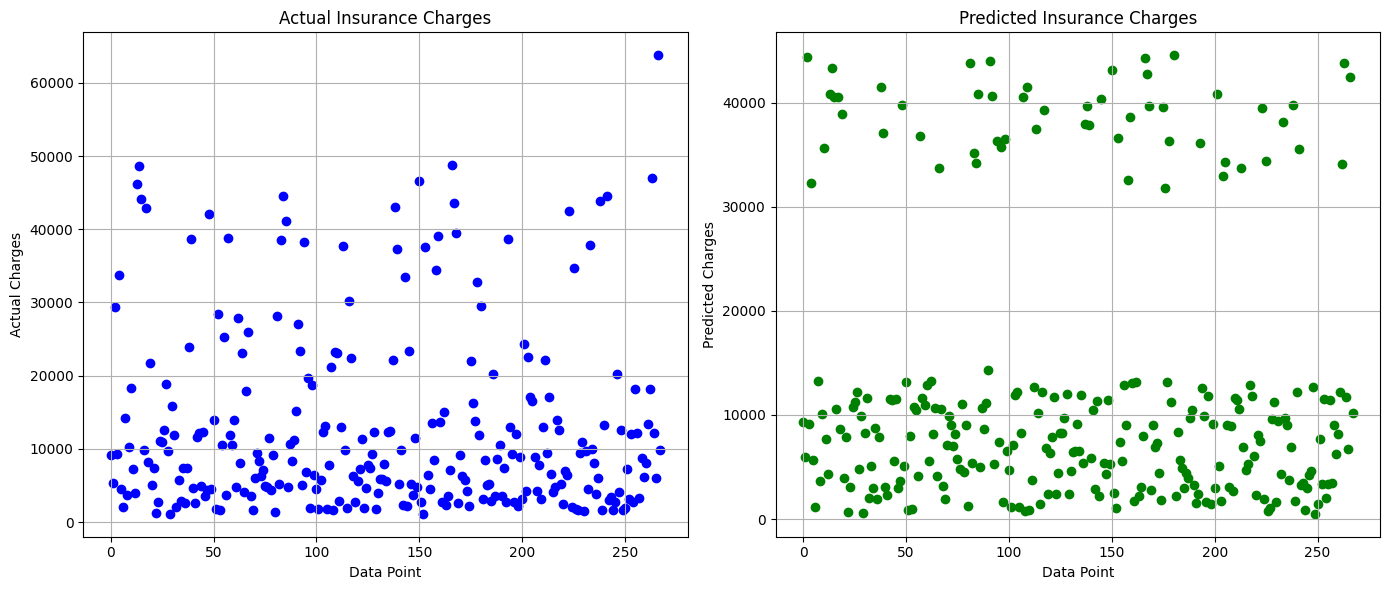

In [144]:

# Predicting on the test data
y_pred = insurance_model_3.predict(X_test_normal)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot actual values
ax1.scatter(range(len(y_test)), y_test, c='blue', label='Actual Charges')
ax1.set_xlabel('Data Point')
ax1.set_ylabel('Actual Charges')
ax1.set_title('Actual Insurance Charges')
ax1.grid(True)

# Plot predicted values
ax2.scatter(range(len(y_pred)), y_pred, c='green', label='Predicted Charges')
ax2.set_xlabel('Data Point')
ax2.set_ylabel('Predicted Charges')
ax2.set_title('Predicted Insurance Charges')
ax2.grid(True)

plt.tight_layout()
plt.show()


In [145]:
import pandas as pd

# Create a DataFrame to hold actual and predicted charges
results_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': y_pred.flatten()})

# Display the DataFrame
print(results_df)


      Actual Charges  Predicted Charges
764       9095.06825        9297.855469
887       5272.17580        6008.648438
890      29330.98315       44423.722656
1293      9301.89355        9162.535156
259      33750.29180       32328.617188
...              ...                ...
109      47055.53210       43826.648438
575      12222.89830       11681.887695
535       6067.12675        6737.045898
543      63770.42801       42462.445312
846       9872.70100       10178.203125

[268 rows x 2 columns]


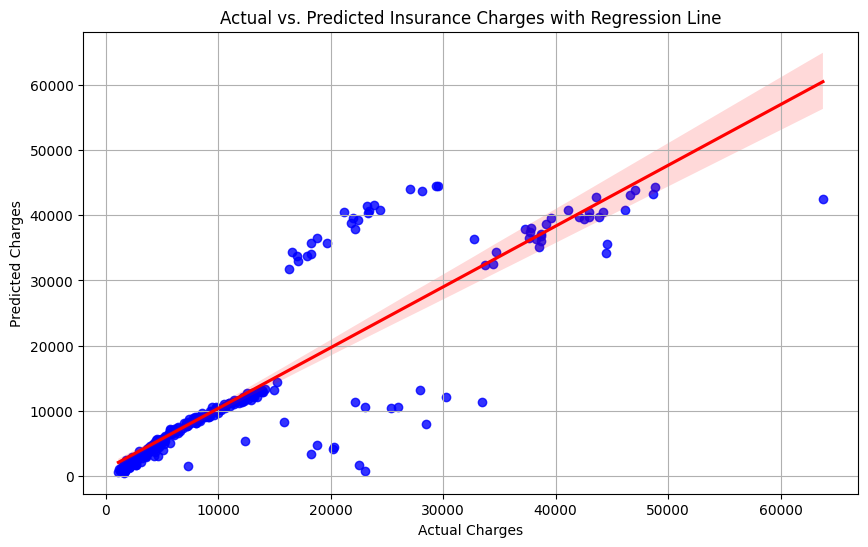

In [146]:


# Create a DataFrame for actual and predicted charges
results_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': y_pred.flatten()})

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual Charges', y='Predicted Charges', data=results_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Insurance Charges with Regression Line')
plt.grid(True)
plt.show()
